In [112]:
#Import Libraries
import pandas as pd
from fbprophet import Prophet

In [113]:
#Load data file
file_path = '/content/Sales_Data.xlsx'
sales_df = pd.read_excel(file_path)
sales_df.head()

,ClosePrice,CloseDate
0,120000,2017-11-17
1,115000,2018-01-25
2,125000,2018-02-02
3,116000,2018-02-08
4,96500,2018-02-26


In [114]:
#Describe data
sales_df.describe()

,ClosePrice
count,232.000000
mean,127848.370690
std,25236.451187
min,68000.000000
25%,112375.000000
50%,125000.000000
75%,140000.000000
max,205000.000000


In [115]:
#Check data types
sales_df.dtypes

ClosePrice             int64
CloseDate     datetime64[ns]
dtype: object

In [116]:
#Rename columns
sales_df.rename({'ClosePrice':'y'}, axis='columns', inplace = True)
sales_df.rename({'CloseDate':'ds'}, axis='columns', inplace = True)
sales_df.head()

,y,ds
0,120000,2017-11-17
1,115000,2018-01-25
2,125000,2018-02-02
3,116000,2018-02-08
4,96500,2018-02-26


In [117]:
#Define model and fit sales data
m = Prophet()
model = m.fit(sales_df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [118]:
#Create forecast with monthly frequency and period of 6 months
future = m.make_future_dataframe(periods=6,freq='M')
forecast = m.predict(future)
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-11-17,102584.711188,87686.444539,126392.314150,102584.711188,102584.711188,3739.950013,3739.950013,3739.950013,1998.311766,1998.311766,1998.311766,1741.638247,1741.638247,1741.638247,0.0,0.0,0.0,106324.661201
1,2018-01-25,103823.807021,92631.990973,132058.580851,103823.807021,103823.807021,8830.911763,8830.911763,8830.911763,4345.905681,4345.905681,4345.905681,4485.006083,4485.006083,4485.006083,0.0,0.0,0.0,112654.718784
2,2018-02-02,103967.470306,91081.627431,129780.247708,103967.470306,103967.470306,6767.770197,6767.770197,6767.770197,1998.311766,1998.311766,1998.311766,4769.458431,4769.458431,4769.458431,0.0,0.0,0.0,110735.240502
3,2018-02-08,104075.217769,89903.775772,129972.703906,104075.217769,104075.217769,5639.382707,5639.382707,5639.382707,4345.905681,4345.905681,4345.905681,1293.477026,1293.477026,1293.477026,0.0,0.0,0.0,109714.600476
4,2018-02-26,104398.460160,83648.179048,123597.128527,104398.460160,104398.460160,-183.883847,-183.883847,-183.883847,1447.708680,1447.708680,1447.708680,-1631.592527,-1631.592527,-1631.592527,0.0,0.0,0.0,104214.576313
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2021-12-31,173907.925641,153230.728705,192300.777342,173803.769179,174017.407484,-1784.976347,-1784.976347,-1784.976347,1998.311766,1998.311766,1998.311766,-3783.288113,-3783.288113,-3783.288113,0.0,0.0,0.0,172122.949294
196,2022-01-31,176875.202567,163670.073068,204077.256902,176638.085768,177138.217202,6801.886732,6801.886732,6801.886732,1447.708680,1447.708680,1447.708680,5354.178052,5354.178052,5354.178052,0.0,0.0,0.0,183677.089299
197,2022-02-28,179555.323661,161052.215320,200685.298702,179153.994264,180006.949171,615.317259,615.317259,615.317259,1447.708680,1447.708680,1447.708680,-832.391421,-832.391421,-832.391421,0.0,0.0,0.0,180170.640920
198,2022-03-31,182522.600587,165813.463022,206126.816691,181893.479862,183194.107356,2368.409408,2368.409408,2368.409408,4345.905681,4345.905681,4345.905681,-1977.496273,-1977.496273,-1977.496273,0.0,0.0,0.0,184891.009995


In [119]:
#Display date and predicted value
forecast[['ds','yhat']]

,ds,yhat
0,2017-11-17,106324.661201
1,2018-01-25,112654.718784
2,2018-02-02,110735.240502
3,2018-02-08,109714.600476
4,2018-02-26,104214.576313
...,...,...
195,2021-12-31,172122.949294
196,2022-01-31,183677.089299
197,2022-02-28,180170.640920
198,2022-03-31,184891.009995


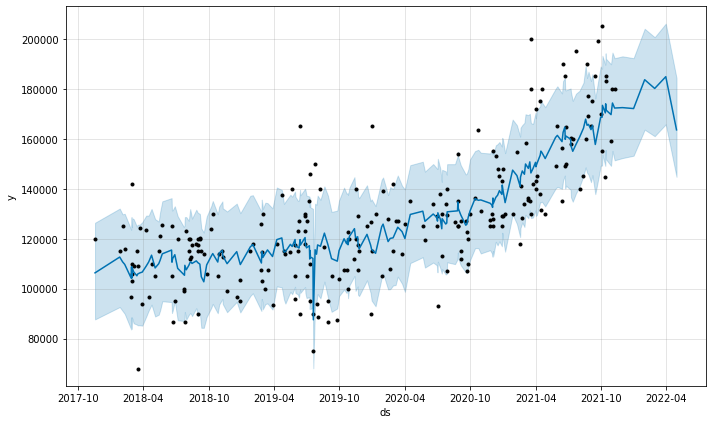

In [120]:
#Plot forecast
plot1 = m.plot(forecast)

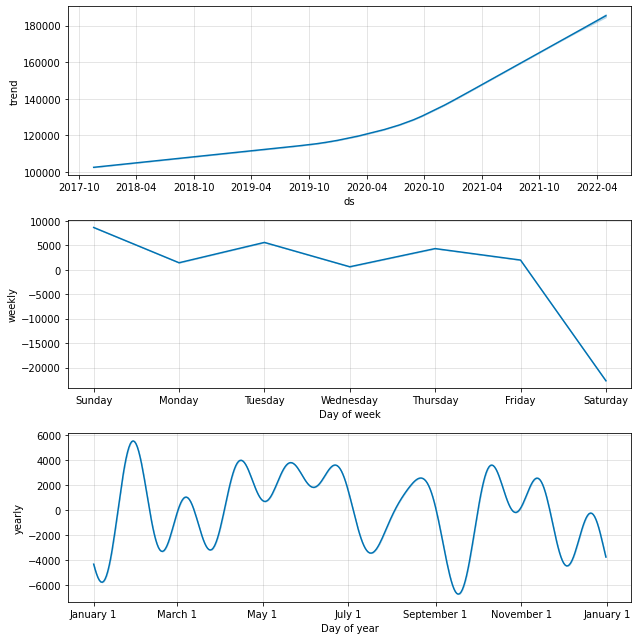

In [121]:
#Plot forecast components
plot2 = m.plot_components(forecast)